In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import mglearn

%matplotlib inline

## DBScan

Se emplea el DataSet de Iris de sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN


iris = load_iris()

df = pd.DataFrame(iris.data)
df.columns= iris.feature_names
df["type"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = df[df.columns[:-1]]
y = iris.target

escala = MinMaxScaler()
x_escalada = escala.fit_transform(X)

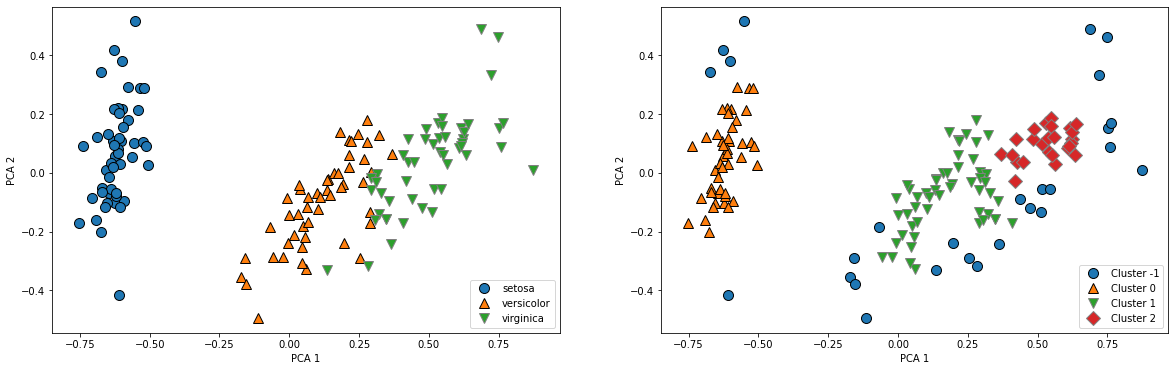

In [4]:
pca =PCA(n_components=2) 
pca.fit(x_escalada)

fig = plt.figure(figsize=(20,6))
transformada = pca.transform(x_escalada)

dbscan = DBSCAN(eps= 0.08, min_samples=6)
dbscan.fit(transformada)
df["cluster"] = dbscan.labels_

plt.subplot(1,2,1)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], y )
plt.legend(iris.target_names, loc="best")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


plt.subplot(1,2,2)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], df.cluster )
plt.legend(["Cluster %d"%i for i in sorted(df.cluster.unique())], loc="best")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

In [5]:
df[df['cluster']==0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,cluster
count,45.000000,45.000000,45.000000,45.000000,45.0,45.0
mean,4.968889,3.386667,1.471111,0.246667,0.0,0.0
std,0.315380,0.276833,0.176612,0.105744,0.0,0.0
min,4.300000,2.900000,1.000000,0.100000,0.0,0.0
25%,4.800000,3.200000,1.400000,0.200000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.200000,0.0,0.0
75%,5.100000,3.600000,1.600000,0.300000,0.0,0.0
max,5.700000,3.900000,1.900000,0.600000,0.0,0.0


## K-means

Se emplea un DataSet de peliculas y series de plataformas de Streaming como Netflix, Disney+, HBO, etc

In [6]:
df = pd.read_csv('data/All_Streaming_Shows.csv')

df['Content Rating'] = df['Content Rating'].str.replace('+','').fillna('-1')
df['Content Rating'] = df['Content Rating'].str.replace('all','0').astype(int)

df['IMDB Rating'].fillna(0, inplace=True)

df['No of Seasons'] = df['No of Seasons'].str.replace('Seasons','').str.replace('Season','').astype(int)
df['Crime'] = df['Genre'].str.contains('Crime').astype(int)
df['Drama'] = df['Genre'].str.contains('Drama').astype(int)
df['Action'] = df['Genre'].str.contains('Action').astype(int)
df['Comedy'] = df['Genre'].str.contains('Comedy').astype(int)
df['Fantasy'] = df['Genre'].str.contains('Fantasy').astype(int)
df['Animation'] = df['Genre'].str.contains('Animation').astype(int)

df['Disney'] = df['Streaming Platform'].str.contains('Disney').fillna(0).astype(int)
df['Netflix'] = df['Streaming Platform'].str.contains('Netflix').fillna(0).astype(int)
df['HBO'] = df['Streaming Platform'].str.contains('HBO').fillna(0).astype(int)

features = ['Content Rating', 'IMDB Rating','R Rating','No of Seasons']

df.head()

,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform,Crime,Drama,Action,Comedy,Fantasy,Animation,Disney,Netflix,HBO
0,Breaking Bad,2008,18,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5,Netflix,1,1,0,0,0,0,0,1,0
1,Game of Thrones,2011,18,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8,"HBO MAX,HBO",0,1,1,0,0,0,0,0,1
2,Rick and Morty,2013,18,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4,"Free Services,HBO MAX,Hulu",0,0,0,1,0,1,0,0,1
3,Stranger Things,2016,16,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3,Netflix,0,1,0,0,1,0,0,1,0
4,The Boys,2019,18,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as “The...,2,Prime Video,0,0,1,1,0,0,0,0,0


In [7]:
X = df[features].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_scaled)

labels = kmeans.labels_
df['cluster'] = labels

c:\users\josue\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


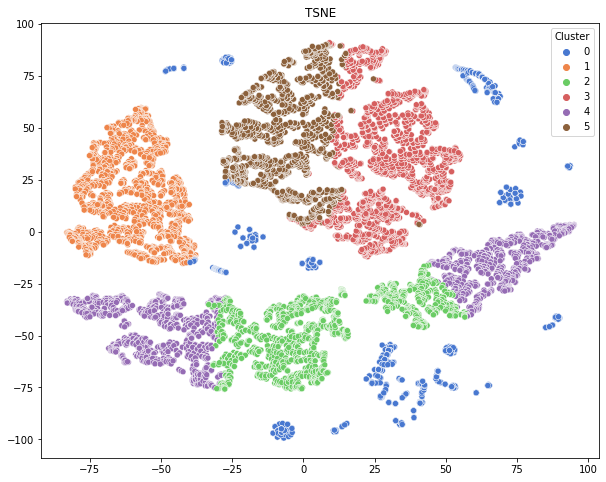

In [8]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
ax = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=labels, legend='full', palette='muted')
title = 'TSNE'
plt.title(title)
plt.legend(title='Cluster')
plt.show()

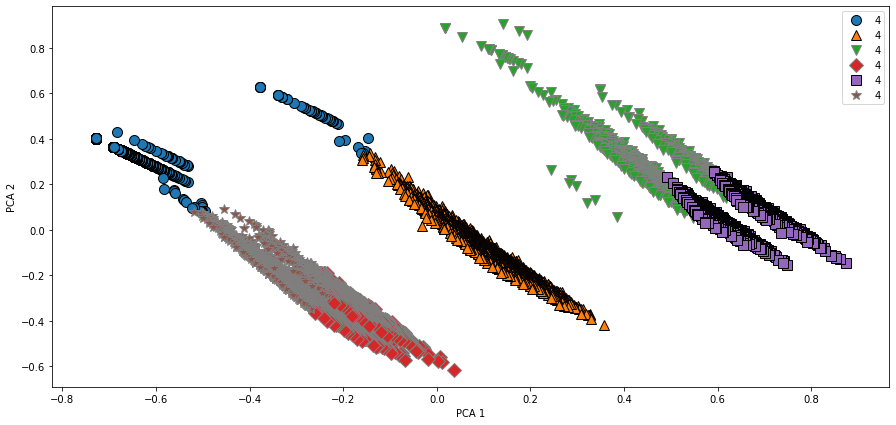

In [9]:
pca = PCA(n_components = 2)
transformada = pca.fit_transform(X_scaled)

plt.figure(figsize=(15,7))
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], labels)
plt.legend(labels, loc="best")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()